In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

## United States Fiscal Statistics and National Debt

The following dataset includes information from the past 50 years regarding the United States economy, including market interest rates, federal funds rate, inflation, unemployment, and the rate of return for 10-year treasury bonds. In light of the bill passed June 5th to suspend the debt ceiling, I've chosen to include our national debt as the target variable of this study.

In [2]:
df = pd.read_excel(r"C:\Users\Isaiah Erb\Documents\Work Portfolio\United States Federal Spending\US Fiscal History.xlsx",sheet_name = 'Analysis')

In [3]:
del df['National Debt']

In [4]:
df

,Year,Interest Rate,Federal Funds Rate,Inflation,Unemployment,10-Year Treasury Bond,National Debt Trillions,Target Debt Ceiling 2025
0,1974,0.0919,0.1051,0.1105,0.072,0.0756,0.475060,31.4
1,1975,0.0905,0.0582,0.0914,0.082,0.0799,0.533189,31.4
2,1976,0.0887,0.0505,0.0574,0.078,0.0761,0.620433,31.4
3,1977,0.0885,0.0554,0.0650,0.064,0.0742,0.698840,31.4
4,1978,0.0964,0.0794,0.0763,0.060,0.0841,0.771544,31.4
5,1979,0.1120,0.1120,0.1125,0.060,0.0943,0.826519,31.4
6,1980,0.1374,0.1335,0.1355,0.072,0.1143,0.907701,31.4
7,1981,0.1663,0.1639,0.1033,0.085,0.1392,0.997855,31.4
8,1982,0.1604,0.1224,0.0613,0.108,0.1301,1.142034,31.4
9,1983,0.1324,0.0909,0.0321,0.083,0.1110,1.377210,31.4


#### National Debt Graphed with Debt Ceiling

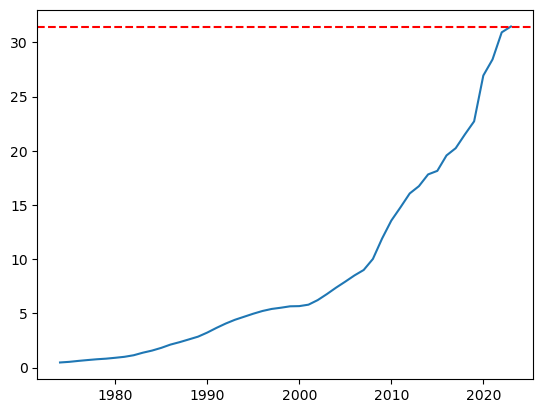

In [5]:
plt.plot(df['Year'],df['National Debt Trillions'])
plt.axhline(y=31.4, color='red', linestyle='--')

The national debt has risen to $31.4 trillion over the last 50 years. Significant changes started to occur when economic recession hit in 1984 and again  in 1991, and when the 2008 recession hit, national debt skyrocketed 10 trillion in the next 10 years. The wars in Iraq and Afghanistan were catalyst for increases since 2003, in addition to the COVID-19 pandemic in 2020.

#### Multi-Linear Regression Model

The following code creates a linear regression model to predict the nations debt using the other economic measures in the dataset. First, the data is cleansed and all unecessary columns will be dropped. Next, the data is split into training and testing datasets to be used in the model. My task was to fit the model, determine the intercept and coefficients, and print out the regression equation.

In [6]:
del df['Target Debt Ceiling 2025']
del df['Year']

In [7]:
X = df.drop(columns = 'National Debt Trillions')
Y = df['National Debt Trillions']

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 0)

In [9]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [10]:
results = lr.fit(X,Y)

In [11]:
c = lr.intercept_
c

17.79171442230474

In [12]:
m = lr.coef_
m

array([ 400.14151597,   38.91403147,   25.66561856,  -45.32907411,
       -668.28136316])

In [38]:
equation = f'Y = {m:.2f}X + {c:.2f}'
print(equation)

Y = -213.89X + 17.79


In [13]:
y_pred = lr.predict(X)

In [14]:
y_pred

array([ 7.70487091,  1.50249079,  2.33075247,  4.54080325,  2.49121027,
        4.11464083,  1.79562009, -3.51322037, -3.5281519 , -2.80994151,
       -8.1609964 , -2.55204509,  7.45103635,  3.52463574,  1.61395503,
        4.72509281,  2.87024172,  2.27129771,  3.31015472,  6.7998929 ,
        3.75747911,  6.06831485,  6.37212332,  6.35628506, 10.89517444,
       10.48728764, 11.23363984, 11.78629786, 11.49140194, 12.76046301,
       11.38977275, 12.51272258, 12.13182775, 12.57093209, 15.88483669,
       11.65516228, 11.31504914, 14.01676627, 17.41259046, 15.39321022,
       15.41564651, 16.71087489, 18.44518771, 17.08861796, 15.92213803,
       19.02270676, 22.13020392, 19.41929634, 26.59088924, 14.03589861])

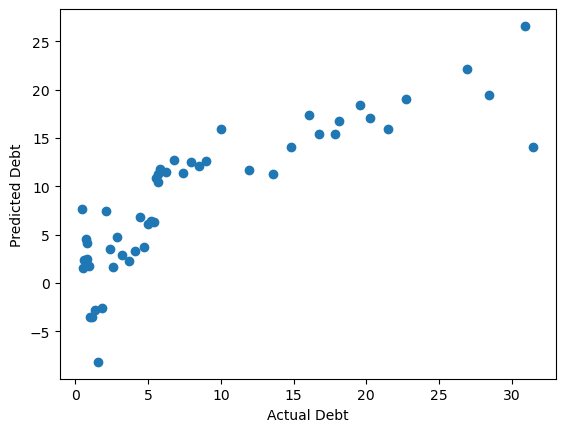

In [15]:
plt.scatter(Y, y_pred)
plt.xlabel("Actual Debt")
plt.ylabel("Predicted Debt")
plt.show()

The graph above shows the results of the regression model, with the predicted debt plotted on the Y-axis and the actual debt plotted on the X. We can see a clear linear relationship between the results of the model and the actual values. The r-squared value of 0.712 indicates that the model is effective in predicting the national debt given the statistics in the dataset. Additional details including the r-squared value and a dataframe with the actual and predicted values, as well as the difference between the two.

In [16]:
from sklearn.metrics import r2_score

In [17]:
r2_score(Y, y_pred)

0.712564143079411

In [18]:
df_predicted = pd.DataFrame({'Actual Value':Y, 'Predicted Value':y_pred, 'Difference':Y - y_pred})
df_predicted

,Actual Value,Predicted Value,Difference
0,0.475060,7.704871,-7.229811
1,0.533189,1.502491,-0.969302
2,0.620433,2.330752,-1.710319
3,0.698840,4.540803,-3.841963
4,0.771544,2.491210,-1.719666
5,0.826519,4.114641,-3.288122
6,0.907701,1.795620,-0.887919
7,0.997855,-3.513220,4.511075
8,1.142034,-3.528152,4.670186
9,1.377210,-2.809942,4.187152


### Analyzing Other Fiscal Measures

The purpose of the following code provide analysis of the other economic measures in the dataset.

In [26]:
df

,Year,Interest Rate,Federal Funds Rate,Inflation,Unemployment,10-Year Treasury Bond,National Debt,National Debt Trillions,Target Debt Ceiling 2025
Year,,,,,,,,,
1974,1974,0.0919,0.1051,0.1105,0.072,0.0756,4.750598e+11,0.475060,31.4
1975,1975,0.0905,0.0582,0.0914,0.082,0.0799,5.331890e+11,0.533189,31.4
1976,1976,0.0887,0.0505,0.0574,0.078,0.0761,6.204330e+11,0.620433,31.4
1977,1977,0.0885,0.0554,0.0650,0.064,0.0742,6.988400e+11,0.698840,31.4
1978,1978,0.0964,0.0794,0.0763,0.060,0.0841,7.715440e+11,0.771544,31.4
1979,1979,0.1120,0.1120,0.1125,0.060,0.0943,8.265190e+11,0.826519,31.4
1980,1980,0.1374,0.1335,0.1355,0.072,0.1143,9.077010e+11,0.907701,31.4
1981,1981,0.1663,0.1639,0.1033,0.085,0.1392,9.978550e+11,0.997855,31.4
1982,1982,0.1604,0.1224,0.0613,0.108,0.1301,1.142034e+12,1.142034,31.4


In [27]:
del df['National Debt']

In [28]:
del df['National Debt Trillions']

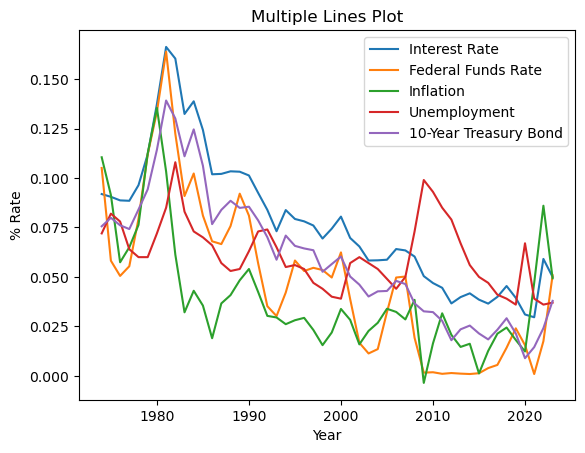

In [30]:
x = df.index
y1 = df['Interest Rate']
y2 = df['Federal Funds Rate']
y3 = df['Inflation']
y4 = df['Unemployment']
y5 = df['10-Year Treasury Bond']

# Create the plot
plt.plot(x, y1, label='Interest Rate')
plt.plot(x, y2, label='Federal Funds Rate')
plt.plot(x, y3, label='Inflation')
plt.plot(x, y4, label='Unemployment')
plt.plot(x, y5, label='10-Year Treasury Bond')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('% Rate')
plt.title('Multiple Lines Plot')

# Add a legend
plt.legend()

# Display the plot
plt.show()

#edit plot size to be bigger

The recessions in 1984, 1991, and 2008 all had adverse effects on the US economy, causing figures to rise in the corresponding years, dropping shortly after. For reference, the federal funds rate is the rate at which banks can borrow cash from other banks, and is an important indicator of our economy. Increases in each of the stats listed above also occurred in conjunction with September 11th and hurricanes Katrina and Rita in 2005.

#### Correlation Between Unemployment Rate and National Debt

The following code is to check the correlation between unemployment and the US National Debt. My hypothesis is that these variables are strongly correlated, and if the debt ceiling is breached in 2025 or the national debt takes a turn for the worse, unemployment rates will skyrocket and several people will be out of jobs.

In [33]:
df = pd.read_excel(r"C:\Users\Isaiah Erb\Documents\Work Portfolio\United States Federal Spending\US Fiscal History.xlsx",sheet_name = 'Analysis')

In [34]:
# Create a DataFrame with two variables
data = {'X': df['Unemployment'], 'Y': df['National Debt Trillions']}
df_corr = pd.DataFrame(data)

# Calculate the correlation coefficient
correlation = df_corr['X'].corr(df_corr['Y'])

print("Correlation coefficient:", correlation)

Correlation coefficient: -0.4152263355631373


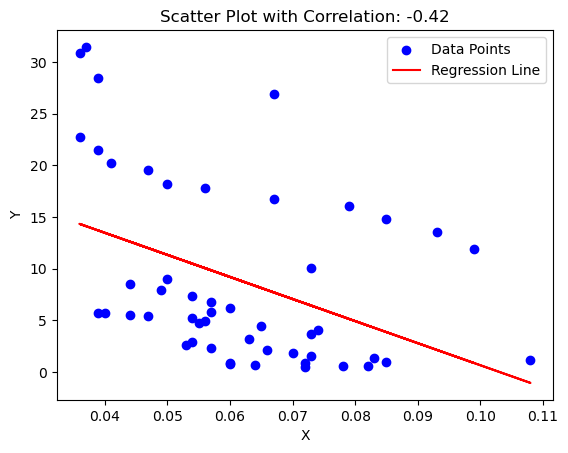

In [35]:
x = df['Unemployment']
y = df['National Debt Trillions']

correlation = np.corrcoef(x, y)[0, 1]

# Create a scatter plot
plt.scatter(x, y, color='blue', label='Data Points')

# Add a trendline or regression line
m, b = np.polyfit(x, y, 1)  # Fit a linear regression line
plt.plot(x, m*x + b, color='red', label='Regression Line')

# Add labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title(f'Scatter Plot with Correlation: {correlation:.2f}')

# Add a legend
plt.legend()

# Display the plot
plt.show()

Unemployment and the national debt are correlated around -0.42. Right now, employment is surprisingly low just according to the National Debt as the only determinant factor. Points below the regression line indicate that as debt decreases, unemployment increases (negative correlation). Points above indicate that as the debt increases, unemployment decreases. My hypothesis wasn't entirely correct, but including research that's been done about the effect of the United States reaching a default, the effects would still be drastic regarding unemployment. 